### pip 설치
+ pip install nltk
+ pip install konlpy
    - import konlpy 시 오류 attributeerror: module 'tweepy' has no attribute 'streamlistener'
    - tweepy 버전이 3.x.x 이어야 함.
    - pip install tweepy==3.10.0
+ pip install jpype1 Jpype1-py3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('appreview.csv', encoding='UTF-8')

In [5]:
df.head()

,Review,Score
0,서울랜드 안에 있는데도 입장 후 이용이 가능하다는건 대체 뭔말인가요 ???♀? 어플...,1
1,다운받아도 접속안되는건 머져,1
2,완전오류심함,1
3,개후뤠기 시간별로 계속다운됨 주말 예약 드릅게 힘듬,1
4,화난 이모티콘,1


In [7]:
# 데이터 셋 확인
df.columns = ['text','rating']

In [8]:
# 결측치 값 처리하기
df.isnull().sum()

text      0
rating    0
dtype: int64

In [9]:
df = df[df['text'].notnull()]
df = df[df['rating'].notnull()]

In [10]:
# 결측치 값 처리하기
df.isnull().sum()

text      0
rating    0
dtype: int64

In [11]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    75 non-null     object
 1   rating  75 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [12]:
# 데이터 변수 확인
df['text']

0     서울랜드 안에 있는데도 입장 후 이용이 가능하다는건 대체 뭔말인가요 ???♀? 어플...
1                                       다운받아도 접속안되는건 머져
2                                                완전오류심함
3                          개후뤠기 시간별로 계속다운됨 주말 예약 드릅게 힘듬
4                                               화난 이모티콘
                            ...                        
70             정말 별로다. 왜있는지 모르겠음. 줄 설 때마다 자괴감이 든다. . ㅡㅡ
71                                    새치기 패스. 어처구니 없는 앱
72                                     정말감사합님담욤^^사랑합님담욤
73                예약하려니 서울랜드 입장하라 뜨네요 안에있는데 따로 인증해야하나요?
74                                              나쁘지 않아요
Name: text, Length: 75, dtype: object

In [14]:
df['text'][10]

'먹통이 너무 잘 돼... 접속자 수 좀만 많으면 먹통인게 말이되냐 예약이 안되잖아요....'

In [15]:
# 정규 표현식 함수 정의
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [16]:
# 기존 데이터
df['text'][0]

'서울랜드 안에 있는데도 입장 후 이용이 가능하다는건 대체 뭔말인가요 ???♀? 어플없이는 브루미즈 예약도 안되고... 하…'

In [17]:
# 정규식 표현 적용 후 데이터
apply_regular_expression(df['text'][0])

'서울랜드 안에 있는데도 입장 후 이용이 가능하다는건 대체 뭔말인가요  어플없이는 브루미즈 예약도 안되고 하'

In [18]:
# 한국어 행태소 명사 단위 
from konlpy.tag import Okt
from collections import Counter

In [19]:
apply_regular_expression(df['text'][0])

'서울랜드 안에 있는데도 입장 후 이용이 가능하다는건 대체 뭔말인가요  어플없이는 브루미즈 예약도 안되고 하'

In [20]:
okt = Okt()  # 명사 형태소 추출 함}수
nouns = okt.nouns(apply_regular_expression(df['text'][0]))
nouns

['서울', '랜드', '안', '입장', '후', '이용', '대체', '말', '어플', '브루', '미즈', '예약']

In [22]:
# 말뭉치 생성
#dft = df.iloc[:,1].tolist()
#sdft = str(dft)
corpus = "".join(df['text'].tolist())
corpus

'서울랜드 안에 있는데도 입장 후 이용이 가능하다는건 대체 뭔말인가요 ???♀? 어플없이는 브루미즈 예약도 안되고... 하…다운받아도 접속안되는건 머져완전오류심함개후뤠기 시간별로 계속다운됨 주말 예약 드릅게 힘듬화난 이모티콘이서비스를 계속 고집하는 운영진은 도대체 무슨 생각인거지? 앱개발비용과 초기 사업비 쏟아부운거 때문에 상부에 말못하는게 뻔히보이네....지금 막 깔았는데 아이디랑 비밀번호 입력하래서 하고 눌렀는데 그냥 종료되요.루나페스? 그거 구경한번 못 해봤습니다. 0점은 없나요?대기원활이라는데 루나 이용객도 없는데 다 마감 쓸데 없는 앱쓰레기앱 에러가 너무 많이 떠요.먹통이 너무 잘 돼... 접속자 수 좀만 많으면 먹통인게 말이되냐 예약이 안되잖아요....별 0개는 없나? 서버 감당도 안되게 만들어 놓고 예약 안하면 입장 안되는 곳까지 있고 예약하라도 방송 계속 나오고! 이럴거면 만들지를 마라! 이거 아니자나!되질않아요ㅡㅡ지도 볼때는 항상 나갔다 들어와야 새로고침 되는 건가요?예약 할 수 있는것도 몇개 없고 다른건 만족합니다안좋다이거 왜 만드신거예요;; 허탈하네.. 아무짝에도 쓸데없는데,이 어플의 핵심 기능인 놀이기구 탑승 예약기능이 일요일에 갔더니 운영 안 하는 날이라고 뜨면서 안 되더군요. 사람 많을 때 오히려 더 필요한 기능인데... 덕분에 일일히 줄 서서 타는데 사람 어마어마하게 많아서 하루종일 놀았는데 3개 밖에 못 탔습니다. 놀이기구 지도에 탑승가능 신장 같은 거 정보 좀 나왔으면 좋겠습니다. 아니면 일일히 직접 앞에 가서 표지판 보고 확인해야하니까요.아니 오류로 접속이 안되요이 쓰레기같은 앱은 뭐지 관리안할거면 삭제하세오운영안하는 날이 제일 붐비는 날. 이럴거면 뭐하러 만들었는지. 비대면 줄서기위해서 만들었다더니 ㅋ한개도 아까워요. 위치정보는 왜 필수로 요청하는지도 모르겠고, 앱켜두면 배터리 광탈입니다. 접속자 수 조금만 늘어나면 먹통되고…버전1.1.0설치시 강제종료 팝업뜨면서 실행자체가 안됩니다.서울랜드 입장 서울랜드 놀이기구 서울랜드놀이

In [23]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'서울랜드 안에 있는데도 입장 후 이용이 가능하다는건 대체 뭔말인가요  어플없이는 브루미즈 예약도 안되고 하다운받아도 접속안되는건 머져완전오류심함개후뤠기 시간별로 계속다운됨 주말 예약 드릅게 힘듬화난 이모티콘이서비스를 계속 고집하는 운영진은 도대체 무슨 생각인거지 앱개발비용과 초기 사업비 쏟아부운거 때문에 상부에 말못하는게 뻔히보이네지금 막 깔았는데 아이디랑 비밀번호 입력하래서 하고 눌렀는데 그냥 종료되요루나페스 그거 구경한번 못 해봤습니다 점은 없나요대기원활이라는데 루나 이용객도 없는데 다 마감 쓸데 없는 앱쓰레기앱 에러가 너무 많이 떠요먹통이 너무 잘 돼 접속자 수 좀만 많으면 먹통인게 말이되냐 예약이 안되잖아요별 개는 없나 서버 감당도 안되게 만들어 놓고 예약 안하면 입장 안되는 곳까지 있고 예약하라도 방송 계속 나오고 이럴거면 만들지를 마라 이거 아니자나되질않아요ㅡㅡ지도 볼때는 항상 나갔다 들어와야 새로고침 되는 건가요예약 할 수 있는것도 몇개 없고 다른건 만족합니다안좋다이거 왜 만드신거예요 허탈하네 아무짝에도 쓸데없는데이 어플의 핵심 기능인 놀이기구 탑승 예약기능이 일요일에 갔더니 운영 안 하는 날이라고 뜨면서 안 되더군요 사람 많을 때 오히려 더 필요한 기능인데 덕분에 일일히 줄 서서 타는데 사람 어마어마하게 많아서 하루종일 놀았는데 개 밖에 못 탔습니다 놀이기구 지도에 탑승가능 신장 같은 거 정보 좀 나왔으면 좋겠습니다 아니면 일일히 직접 앞에 가서 표지판 보고 확인해야하니까요아니 오류로 접속이 안되요이 쓰레기같은 앱은 뭐지 관리안할거면 삭제하세오운영안하는 날이 제일 붐비는 날 이럴거면 뭐하러 만들었는지 비대면 줄서기위해서 만들었다더니 ㅋ한개도 아까워요 위치정보는 왜 필수로 요청하는지도 모르겠고 앱켜두면 배터리 광탈입니다 접속자 수 조금만 늘어나면 먹통되고버전설치시 강제종료 팝업뜨면서 실행자체가 안됩니다서울랜드 입장 서울랜드 놀이기구 서울랜드놀이기구 뭐가 안할까요놀이기구 순서도 기준이 없고 무조건 는 켜라고 해서 배터리 광탈하게 만들고 쓰면 쓸수록

In [24]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['서울', '랜드', '안', '입장', '후', '이용', '대체', '말', '어플', '브루', '미즈', '예약', '접속', '머', '완전', '오류', '개후뤠기', '시간', '별로', '계속', '다운', '주말', '예약', '드릅', '화난', '이모티콘', '서비스', '계속', '고집', '운영', '진', '도대체', '무슨', '생각', '거지', '앱', '개발', '비용', '초기', '사업', '비', '때문', '상부', '보이', '지금', '막', '아이디', '비밀번호', '입력', '하래', '그냥', '종료', '루나', '페스', '그거', '구경', '한번', '못', '점', '대기', '원활', '데', '루나', '이용', '객', '마감', '앱', '쓰레기', '앱', '에러', '먹통', '접속', '수', '좀', '먹통', '말', '예약', '별', '서버', '감당', '예약', '입장', '곳', '예약', '방송', '계속', '거', '자', '지도', '볼때', '항상', '새로고침', '건가', '예약', '수', '몇개', '왜', '짝', '어플', '핵심', '기능', '놀이기구', '탑승', '기능', '일요일', '운영', '안', '날', '안', '사람', '때', '오히려', '더', '기능', '덕분', '일일', '줄', '서서', '사람', '하루', '종일', '개', '못', '놀이기구', '지도', '탑승', '가능', '신장', '거', '정보', '좀', '일일', '직접', '앞', '표지판', '보고', '확인', '요', '오류로', '접속', '쓰레기', '앱', '뭐', '관리', '안', '삭제', '영안', '날', '제일', '날', '뭐', '비대', '줄', '서기', '위해', '개도', '위치', '정보', '왜', '필수', '요청', '앱켜', '배터리', '광탈', '접속', '수', '조금', '먹통', '버전', '강제', '종

In [25]:
# 빈도 탐색
counter = Counter(nouns)

In [26]:
counter.most_common(10)

[('예약', 23),
 ('접속', 15),
 ('앱', 15),
 ('왜', 10),
 ('줄', 10),
 ('랜드', 9),
 ('안', 8),
 ('서울', 7),
 ('놀이기구', 7),
 ('시간', 6)]

In [27]:
# 한 글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('예약', 23),
 ('접속', 15),
 ('랜드', 9),
 ('서울', 7),
 ('놀이기구', 7),
 ('시간', 6),
 ('계속', 6),
 ('패스', 6),
 ('입장', 5),
 ('어플', 5)]

In [28]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
df1 = TfidfVectorizer(decode_error='replace', encoding='utf-8')
dfx = df1.fit_transform(df.iloc[:,0].values.astype('U'))
dfx

<75x585 sparse matrix of type '<class 'numpy.float64'>'
	with 675 stored elements in Compressed Sparse Row format>

In [34]:
# BoW 백터 생성
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['text'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [35]:
# 단어리스트
word_list

['가가',
 '가기',
 '가능',
 '가요',
 '각자',
 '감당',
 '강제',
 '개도',
 '개발',
 '개선',
 '개판',
 '개후뤠기',
 '거도',
 '거지',
 '건가',
 '겨우',
 '계속',
 '고집',
 '곳곳',
 '곳도',
 '공원',
 '공주',
 '과연',
 '관리',
 '광탈',
 '구경',
 '구축',
 '그거',
 '그냥',
 '급류',
 '기능',
 '기다림',
 '기본',
 '기준',
 '난리',
 '놀이',
 '놀이기구',
 '누군가',
 '누굴위',
 '님담욤',
 '다운',
 '단점',
 '담욤',
 '대기',
 '대책',
 '대체',
 '덕분',
 '도대체',
 '동반',
 '동안',
 '드릅',
 '딱지',
 '때문',
 '랜드',
 '로딩',
 '로또',
 '로만',
 '롯데',
 '루나',
 '마감',
 '마음',
 '만하',
 '매우',
 '머함',
 '먹통',
 '몇개',
 '모니터링',
 '무슨',
 '무조건',
 '미즈',
 '반복',
 '반성',
 '방송',
 '배치',
 '배터리',
 '버전',
 '버터',
 '별도',
 '별로',
 '별하나',
 '보고',
 '보기',
 '보이',
 '보임',
 '보호자',
 '본인',
 '볼때',
 '불가',
 '브루',
 '비대',
 '비밀번호',
 '비용',
 '사람',
 '사랑',
 '사업',
 '사용',
 '사이트',
 '삭제',
 '상부',
 '새로고침',
 '새치기',
 '생각',
 '서고',
 '서기',
 '서버',
 '서비스',
 '서서',
 '서울',
 '서울시',
 '설명',
 '설치',
 '소용',
 '수도권',
 '수동',
 '수만',
 '수준',
 '순서도',
 '스트레스',
 '시간',
 '시스템',
 '신장',
 '실망',
 '실상',
 '실행',
 '쓰레기',
 '쓸모',
 '아예',
 '아이',
 '아이디',
 '아주',
 '애둘',
 '앱켜',
 '양방',
 '어려움',
 '어처구니',
 '어플',
 '억지로',
 '얼마나',

In [36]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([ 1,  1,  1,  3,  2,  2,  1,  2,  1,  2,  1,  1,  1,  2,  1,  1,  6,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  3,  1,  3,  1,  3,  1,
        1,  1,  7,  1,  1,  1,  5,  1,  1,  3,  1,  1,  2,  2,  1,  1,  1,
        1,  2,  9,  1,  1,  1,  1,  4,  1,  1,  1,  1,  1,  3,  2,  1,  2,
        1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  3,  1,  1,  1,  1,  1,  1,
        1,  1,  4,  3,  3,  7,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  6,
        3,  1,  1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,
        1,  1,  1,  2,  3,  1,  1, 24,  1,  2,  1,  2,  1,  1,  1,  6,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  2,  2,  1,  1,  1,  1,
        1,  2,  1,  5,  1,  1,  1,  2,  2,  1,  1, 15,  1,  2,  3,  2,  1,
        2,  1,  1,  1,  2,  1,  2,  1,  1,  1,  2,  2,  3,  1,  1,  4,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  3,  2,  1,  1,  6,  1,  1,  1,  1,
        1,  1,  3,  1,  2

In [37]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
bow_vect.shape

(75, 236)

In [39]:
# "단어" - "총 등장 횟수" Matching
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가가': 1,
 '가기': 1,
 '가능': 1,
 '가요': 3,
 '각자': 2,
 '감당': 2,
 '강제': 1,
 '개도': 2,
 '개발': 1,
 '개선': 2,
 '개판': 1,
 '개후뤠기': 1,
 '거도': 1,
 '거지': 2,
 '건가': 1,
 '겨우': 1,
 '계속': 6,
 '고집': 1,
 '곳곳': 1,
 '곳도': 1,
 '공원': 1,
 '공주': 1,
 '과연': 1,
 '관리': 1,
 '광탈': 2,
 '구경': 1,
 '구축': 1,
 '그거': 2,
 '그냥': 3,
 '급류': 1,
 '기능': 3,
 '기다림': 1,
 '기본': 3,
 '기준': 1,
 '난리': 1,
 '놀이': 1,
 '놀이기구': 7,
 '누군가': 1,
 '누굴위': 1,
 '님담욤': 1,
 '다운': 5,
 '단점': 1,
 '담욤': 1,
 '대기': 3,
 '대책': 1,
 '대체': 1,
 '덕분': 2,
 '도대체': 2,
 '동반': 1,
 '동안': 1,
 '드릅': 1,
 '딱지': 1,
 '때문': 2,
 '랜드': 9,
 '로딩': 1,
 '로또': 1,
 '로만': 1,
 '롯데': 1,
 '루나': 4,
 '마감': 1,
 '마음': 1,
 '만하': 1,
 '매우': 1,
 '머함': 1,
 '먹통': 3,
 '몇개': 2,
 '모니터링': 1,
 '무슨': 2,
 '무조건': 1,
 '미즈': 1,
 '반복': 1,
 '반성': 1,
 '방송': 2,
 '배치': 1,
 '배터리': 2,
 '버전': 1,
 '버터': 1,
 '별도': 1,
 '별로': 3,
 '별하나': 1,
 '보고': 1,
 '보기': 1,
 '보이': 1,
 '보임': 1,
 '보호자': 1,
 '본인': 1,
 '볼때': 1,
 '불가': 1,
 '브루': 1,
 '비대': 1,
 '비밀번호': 1,
 '비용': 1,
 '사람': 2,
 '사랑': 1,
 '사업': 1,
 '사용': 3,
 '사이트': 1,
 '삭제': 1,
 '

### TF-IDF 적용
+ TF-IDF 변환
    - Bag of Words 벡터에 대해서 TF-IDF변환 진행합니다.

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [41]:
print(tf_idf_vect.shape)

(75, 236)


### 변환 후 1001*3599 matrix가 출력됩니다. 
+ 여기서
    - 한 행(row)은 한 리뷰를 의미하고
    - 한 열(column)은 한 단어를 의미합니다.

In [42]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 173)	0.3036843864338912
  (0, 161)	0.36316433285513516
  (0, 143)	0.19618301250573333
  (0, 135)	0.3036843864338912
  (0, 107)	0.3036843864338912
  (0, 88)	0.39795787105646635
  (0, 69)	0.39795787105646635
  (0, 53)	0.2789979782139785
  (0, 45)	0.39795787105646635


In [43]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 236)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.39795787 0.         0.
  0.         0.         0.         0.         0.         0.27899798
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.39795787 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.39795787 0.
  0.         0.         0.         0.         0.         0.
  0.         0.        

In [44]:
# 백터 단어 mapping
vect.vocabulary_

{'서울': 107,
 '랜드': 53,
 '입장': 173,
 '이용': 161,
 '대체': 45,
 '어플': 135,
 '브루': 88,
 '미즈': 69,
 '예약': 143,
 '다운': 40,
 '접속': 181,
 '완전': 148,
 '오류': 145,
 '개후뤠기': 11,
 '시간': 118,
 '별로': 78,
 '계속': 16,
 '주말': 193,
 '드릅': 50,
 '화난': 232,
 '이모티콘': 159,
 '서비스': 105,
 '고집': 17,
 '운영': 151,
 '도대체': 47,
 '무슨': 67,
 '생각': 101,
 '거지': 13,
 '개발': 8,
 '비용': 91,
 '초기': 204,
 '사업': 94,
 '때문': 52,
 '상부': 98,
 '보이': 82,
 '지금': 197,
 '아이디': 128,
 '비밀번호': 90,
 '입력': 172,
 '하래': 225,
 '그냥': 28,
 '종료': 191,
 '루나': 58,
 '페스': 217,
 '그거': 27,
 '구경': 25,
 '한번': 227,
 '원활': 152,
 '마감': 59,
 '쓰레기': 124,
 '에러': 139,
 '먹통': 64,
 '서버': 104,
 '감당': 5,
 '방송': 72,
 '지도': 198,
 '볼때': 86,
 '항상': 228,
 '새로고침': 99,
 '건가': 14,
 '몇개': 65,
 '핵심': 229,
 '기능': 30,
 '놀이기구': 36,
 '탑승': 212,
 '일요일': 170,
 '사람': 92,
 '오히려': 147,
 '덕분': 46,
 '일일': 171,
 '서서': 106,
 '하루': 226,
 '종일': 192,
 '가능': 2,
 '신장': 120,
 '정보': 185,
 '직접': 200,
 '표지판': 220,
 '보고': 80,
 '확인': 233,
 '오류로': 146,
 '관리': 23,
 '삭제': 97,
 '제일': 188,
 '비대': 89,
 '서기':

In [45]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{107: '서울', 53: '랜드', 173: '입장', 161: '이용', 45: '대체', 135: '어플', 88: '브루', 69: '미즈', 143: '예약', 40: ...


### 데이터셋 생성
+ Label
+ 우리는 이용자의 리뷰를 “긍정” / “부정” 두가지 부류로 나누고자 합니다. 하지만 이러한 이용자의 감성을 대표할 수 있는 “평가 점수” 변수는 1 ~ 5의 value를 가지고 있습니다. 따라서 "평가 점수"변수 (rating: 1 ~ 5)를 이진 변수 (긍정: 1, 부정:0)으로 변환해야 합니다.

In [46]:
df.sample(10)

,text,rating
6,지금 막 깔았는데 아이디랑 비밀번호 입력하래서 하고 눌렀는데 그냥 종료되요.루나페스...,4
51,별1도 주기아까움. 이따위 시스템으로 운영할거면 안하는게 나음. 에버랜드 따라하겠다...,1
46,패스 덕분에 넘 잘 다녀왔어요. 아이랑 줄 서서 기다리기 힘든데... 근데 렉이 쫌...,1
36,좋앙,1
38,"왜 이걸 만들었는지? 작동도 계속 오류나고 예약 가능한 거도 몇개없고, 놀이기구 설...",1
12,되질않아요ㅡㅡ,2
66,깔리지도 않고.. 뭐 이따위임,4
63,서울랜드 지금 장난해요? 뭐가되야지 써먹지 되지도않는거 왜 만든거임?,1
28,그지같았음,2
4,화난 이모티콘,1


<AxesSubplot:>

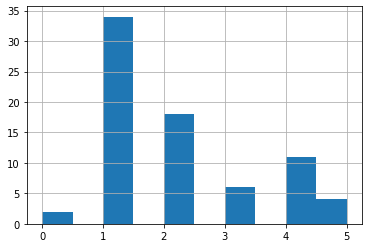

In [47]:
df['rating'].hist()

In [93]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
df['y'] = df['rating'].apply(lambda x: rating_to_label(x))

In [94]:
df.head()

,text,rating,y
0,서울랜드 안에 있는데도 입장 후 이용이 가능하다는건 대체 뭔말인가요 ???♀? 어플...,1,0
1,다운받아도 접속안되는건 머져,1,0
2,완전오류심함,1,0
3,개후뤠기 시간별로 계속다운됨 주말 예약 드릅게 힘듬,1,0
4,화난 이모티콘,1,0


In [95]:
df["y"].value_counts()

0    60
1    15
Name: y, dtype: int64

### Training set / Test set 나누기

In [96]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [97]:
x_train.shape, y_train.shape

((52, 236), (52,))

In [98]:
x_test.shape, y_test.shape

((23, 236), (23,))

### 4-3. 모델 학습
+ Logistic Regression 모델 학습

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [100]:
# 분류 결과 평가
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.87
precision: 0.00
recall: 0.00
F1: 0.00


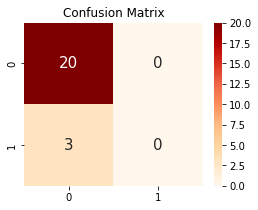

In [101]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [102]:
lr.coef_

array([[ 0.        ,  0.        , -0.03343425,  0.50044204, -0.08100137,
         0.11128849, -0.09724313, -0.05867875, -0.05918526, -0.09798382,
         0.        , -0.07784568, -0.05530597, -0.24460246, -0.07599506,
         0.        , -0.21614861, -0.05918526,  0.1273987 ,  0.        ,
         0.        , -0.13993623,  0.        , -0.10684075, -0.12774314,
         0.20061495,  0.19858723,  0.18307515,  0.13618312,  0.        ,
        -0.10030275,  0.19858723,  0.23252041, -0.07568121,  0.        ,
         0.        , -0.12916744,  0.        ,  0.        ,  0.3303344 ,
        -0.24082461, -0.07568121,  0.3303344 ,  0.46958947,  0.22576153,
        -0.0658128 , -0.1394574 , -0.05401068, -0.04050068,  0.        ,
        -0.07784568,  0.19858723,  0.24781601, -0.26383953,  0.        ,
         0.        ,  0.        ,  0.        ,  0.12301252, -0.1107386 ,
         0.        , -0.12296654,  0.22576153,  0.        , -0.05867875,
        -0.11982135,  0.22576153,  0.06224953, -0.0

<BarContainer object of 236 artists>

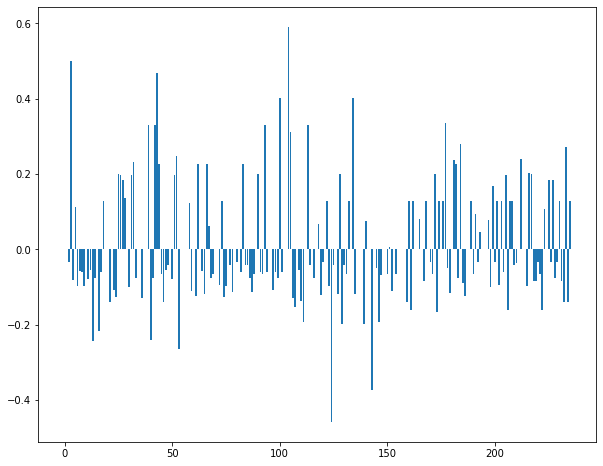

In [103]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [104]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(0.5914477344800825, 104), (0.5004420424362617, 3), (0.4695894729906925, 43), (0.40243322799157843, 134), (0.40243322799157843, 100)]
[(-0.24082461200179767, 40), (-0.24460246360859317, 13), (-0.26383953303150753, 53), (-0.3725126252727654, 143), (-0.45888246355031287, 124)]


In [105]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)
coef_pos_index

[(0.5914477344800825, 104),
 (0.5004420424362617, 3),
 (0.4695894729906925, 43),
 (0.40243322799157843, 134),
 (0.40243322799157843, 100),
 (0.3357966634322953, 177),
 (0.3307436800333505, 113),
 (0.3303344000342851, 93),
 (0.3303344000342851, 42),
 (0.3303344000342851, 39),
 (0.3105850912592835, 105),
 (0.28096165521842703, 184),
 (0.2713156063340065, 233),
 (0.24781601226003744, 52),
 (0.24080452034378708, 212),
 (0.2383394661969518, 181),
 (0.23252041388178485, 32),
 (0.2257615261717237, 182),
 (0.2257615261717237, 83),
 (0.2257615261717237, 66),
 (0.2257615261717237, 62),
 (0.2257615261717237, 44),
 (0.20258441086343068, 216),
 (0.2006149538233244, 217),
 (0.2006149538233244, 172),
 (0.2006149538233244, 128),
 (0.2006149538233244, 90),
 (0.2006149538233244, 25),
 (0.198587227538558, 205),
 (0.198587227538558, 51),
 (0.198587227538558, 31),
 (0.198587227538558, 26),
 (0.18307514730792637, 227),
 (0.18307514730792637, 225),
 (0.18307514730792637, 27),
 (0.16890580014882106, 199),
 (0

In [106]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{107: '서울',
 53: '랜드',
 173: '입장',
 161: '이용',
 45: '대체',
 135: '어플',
 88: '브루',
 69: '미즈',
 143: '예약',
 40: '다운',
 181: '접속',
 148: '완전',
 145: '오류',
 11: '개후뤠기',
 118: '시간',
 78: '별로',
 16: '계속',
 193: '주말',
 50: '드릅',
 232: '화난',
 159: '이모티콘',
 105: '서비스',
 17: '고집',
 151: '운영',
 47: '도대체',
 67: '무슨',
 101: '생각',
 13: '거지',
 8: '개발',
 91: '비용',
 204: '초기',
 94: '사업',
 52: '때문',
 98: '상부',
 82: '보이',
 197: '지금',
 128: '아이디',
 90: '비밀번호',
 172: '입력',
 225: '하래',
 28: '그냥',
 191: '종료',
 58: '루나',
 217: '페스',
 27: '그거',
 25: '구경',
 227: '한번',
 152: '원활',
 59: '마감',
 124: '쓰레기',
 139: '에러',
 64: '먹통',
 104: '서버',
 5: '감당',
 72: '방송',
 198: '지도',
 86: '볼때',
 228: '항상',
 99: '새로고침',
 14: '건가',
 65: '몇개',
 229: '핵심',
 30: '기능',
 36: '놀이기구',
 212: '탑승',
 170: '일요일',
 92: '사람',
 147: '오히려',
 46: '덕분',
 171: '일일',
 106: '서서',
 226: '하루',
 192: '종일',
 2: '가능',
 120: '신장',
 185: '정보',
 200: '직접',
 220: '표지판',
 80: '보고',
 233: '확인',
 146: '오류로',
 23: '관리',
 97: '삭제',
 188: '제일',
 89: '비대',
 103: 

In [118]:
for coef in coef_pos_index[:65]:
    print(invert_index_vectorizer[coef[1]], coef[0])

서버 0.5914477344800825
가요 0.5004420424362617
대기 0.4695894729906925
어처구니 0.40243322799157843
새치기 0.40243322799157843
자체 0.3357966634322953
수동 0.3307436800333505
사랑 0.3303344000342851
담욤 0.3303344000342851
님담욤 0.3303344000342851
서비스 0.3105850912592835
정말 0.28096165521842703
확인 0.2713156063340065
때문 0.24781601226003744
탑승 0.24080452034378708
접속 0.2383394661969518
기본 0.23252041388178485
정각 0.2257615261717237
보임 0.2257615261717237
모니터링 0.2257615261717237
매우 0.2257615261717237
대책 0.2257615261717237
패스 0.20258441086343068
페스 0.2006149538233244
입력 0.2006149538233244
아이디 0.2006149538233244
비밀번호 0.2006149538233244
구경 0.2006149538233244
최신 0.198587227538558
딱지 0.198587227538558
기다림 0.198587227538558
구축 0.198587227538558
한번 0.18307514730792637
하래 0.18307514730792637
그거 0.18307514730792637
지연 0.16890580014882106
그냥 0.1361831241901392
휴일 0.12739870151631147
행성 0.12739870151631147
코인 0.12739870151631147
코로나 0.12739870151631147
차로 0.12739870151631147
진입 0.12739870151631147
제한 0.12739870151631147
자유 0.1

In [112]:
for coef in coef_neg_index[:108]:
    print(invert_index_vectorizer[coef[1]], coef[0])

쓰레기 -0.45888246355031287
예약 -0.3725126252727654
랜드 -0.26383953303150753
거지 -0.24460246360859317
다운 -0.24082461200179767
계속 -0.2161486126556203
아주 -0.1978997192969564
에러 -0.1978997192969564
소용 -0.19208950133253128
오류로 -0.19208950133253128
입장 -0.16714160442037435
최악 -0.16233612095297936
필요 -0.16207283844849665
이용 -0.1611154766416988
서울 -0.15426812989305919
공주 -0.13993623350979212
이모티콘 -0.13993623350979212
화난 -0.13993623350979212
황지원 -0.13993623350979212
덕분 -0.13945739522181722
설치 -0.13778981492161788
서서 -0.1299776587051126
놀이기구 -0.1291674426397875
광탈 -0.1277431428026976
배터리 -0.1277431428026976
만하 -0.12296653628663064
정시 -0.12296653628663064
시스템 -0.1215020482575702
몇개 -0.11982135190837317
아이 -0.11938408417040414
어플 -0.11794047102298176
장난 -0.11553151369616117
불가 -0.11377261705376499
별로 -0.11325040806271951
마감 -0.11073859851600643
원활 -0.11073859851600643
관리 -0.10684075093202802
삭제 -0.10684075093202802
기능 -0.10030274775743406
지도 -0.09986188344810012
개선 -0.09798381584671771
강제 -0.09724313277